# PROYECTO 1: DEEP LEARNING.


## MODELOS LOGIT Y BAGGED TREES

**Integrante 1:** Ángela Patricia Ordoñez Castro...................................................**Código:** 201628709    
**Integrante 2:** Ricardo Medina Aponte................................................................**Código:** 200520707  
**Integrante 3:** Juan Sebastián Garcés Carranza.................................................**Código:** 201628949    
**Integrante 4:** Andrea Carolina Parra López........................................................**Código:** 201727740 

In [1]:
# Importa librerias
import pandas as pd
import numpy as np

Una vez realizada la limpieza de datos de las bases train y test, se imortan los datos con las 434 variables que se mantuveron dentro de las mismas:

In [2]:
# Importar base train con las variables seleccio
# Train
train = pd.read_csv('train4.csv') 
train.head()

,Unnamed: 0,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0015,...,VAR_1869,VAR_1912,VAR_1918,VAR_1921,VAR_1922,VAR_1926,VAR_1929,VAR_1932,VAR_1934,target
0,0,2,H,224,0,4300,C,0.0,0.0,0.0,...,999999998,999999998,9998,98,999999998,98,999999998,9998,IAPS,0
1,1,4,H,7,53,4448,B,1.0,0.0,1.0,...,999999998,6546,9996,98,999999998,98,999999998,9998,IAPS,0
2,2,5,H,116,3,3464,C,0.0,0.0,0.0,...,999999998,999999997,9996,98,999999998,98,999999998,9998,IAPS,0
3,3,7,H,240,300,3200,C,0.0,0.0,0.0,...,999999998,999999998,9998,98,999999998,98,999999998,9998,RCC,0
4,4,8,R,72,261,2000,N,0.0,0.0,0.0,...,999999998,999999998,9998,98,999999998,98,999999998,9998,BRANCH,1


Verificamos la dimension de la base train:

In [3]:
train.shape

(144277, 435)

Se identifican las variables Unnamed:0 y ID como variables de identificación; estas variables no se tendrán en cuenta para el desarrollo de los modelos propuestos.
A continuación denominamos los conjuntos train y test que se usaran para entrenar y validar los modelos propuestos:

In [4]:
y_train = train['target']
X_train = train.drop(['ID','Unnamed: 0','target'], axis=1)
X_train.shape

(144277, 432)

In [5]:
X_test= pd.read_csv('test2.csv') 
X_test.head()

,Unnamed: 0,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0015,...,VAR_1868,VAR_1869,VAR_1912,VAR_1918,VAR_1921,VAR_1922,VAR_1926,VAR_1929,VAR_1932,VAR_1934
0,0,1,R,360,25,2251,B,2.0,2.0,1.0,...,998,999999998,6121,47,98,999999998,98,999999998,9998,IAPS
1,1,3,R,74,192,3274,C,2.0,3.0,2.0,...,0,999999997,999999998,9998,98,999999998,98,999999998,9998,IAPS
2,2,6,R,21,36,3500,C,1.0,1.0,1.0,...,998,999999998,999999998,9998,98,999999998,98,999999998,9998,IAPS
3,3,9,R,8,2,1500,B,0.0,0.0,0.0,...,998,999999998,999999996,9996,1,1140,98,999999998,9998,IAPS
4,4,10,H,91,39,84500,C,8.0,3.0,1.0,...,998,999999998,999999998,9998,98,999999998,98,999999998,9998,IAPS


In [6]:
X_test=X_test.drop(['ID', 'Unnamed: 0'], axis=1)

Se identifican variables categoricas en la base train y test, las cuales se codifican prevamente al entrenamiento y validación de los modelos:

In [7]:
#codifica las variables categoricas
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in X_train.columns:
        if X_train[column_name].dtype == object:
            X_train[column_name] = le.fit_transform(X_train[column_name])
        else:
            pass

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in X_test.columns:
        if X_test[column_name].dtype == object:
            X_test[column_name] = le.fit_transform(X_test[column_name])
        else:
            pass

# Logistic Regression

Iniciamos con una regresión logistica que incluye todas las variables del conjunto de datos X_train_

In [9]:
# train/test split
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# train a logistic regression model
#from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)
#print(y_pred_class)
#pd.value_counts(y_pred_class)

Calibramos el modelo, utilizando el thershold media:

In [10]:
from sklearn.feature_selection import SelectFromModel
model=SelectFromModel(logreg,threshold='mean', prefit=True)
Select_X_train=model.transform(X_train)
Select_X_train

array([[-1.00000000e+00,  4.94630000e+04,  9.99999997e+08, ...,
         9.99999998e+08,  9.99999998e+08,  9.99999998e+08],
       [-1.00000000e+00,  3.03472000e+05,  6.00000000e+00, ...,
         6.54600000e+03,  9.99999998e+08,  9.99999998e+08],
       [-1.00000000e+00,  9.49900000e+04,  9.99999996e+08, ...,
         9.99999997e+08,  9.99999998e+08,  9.99999998e+08],
       ...,
       [-1.00000000e+00,  2.57680000e+04,  0.00000000e+00, ...,
         3.04250000e+04,  9.99999998e+08,  9.99999998e+08],
       [-1.00000000e+00,  4.74400000e+03,  9.99999998e+08, ...,
         9.99999996e+08,  9.99999998e+08,  9.99999998e+08],
       [-1.00000000e+00,  6.34544000e+05,  0.00000000e+00, ...,
         9.99999998e+08,  9.99999998e+08,  9.99999998e+08]])

In [11]:
Select_X_test=model.transform(X_test)

Con la calibración del modelo obtenemos 29 variables predictoras:

In [12]:
Select_X_train.shape

(144277, 29)

Con las variables predictoras, corremos nuevamente un modelo logit:

In [13]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, Select_X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.529848
         Iterations 1
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               144277
Model:                          Logit   Df Residuals:                   144248
Method:                           MLE   Df Model:                           28
Date:                Sun, 24 Jun 2018   Pseudo R-squ.:                 0.02299
Time:                        23:10:35   Log-Likelihood:                -76445.
converged:                       True   LL-Null:                       -78244.
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.864e-09      5e-09      1.173      0.241   -3.93e-09    1.57e-08
x2          5.259e-10   6.33e

De las 29 variables seleccionadas, solo 5 no son significativas; para evaluar la presición del modelo, calculamos el f1_score así:

In [14]:
y_pred=logit_model.predict(Select_X_test[:29,:])

# Bagged Decision trees

In [16]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
kfold = model_selection.KFold(n_splits=10, random_state=1)
cart = DecisionTreeClassifier()
num_trees = 10
model= BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=1)
results = model_selection.cross_val_score(model, Select_X_train, y_train, cv=kfold)
print(results.mean())

0.7603083064631632


In [17]:
results

array([0.76656501, 0.75665373, 0.75540615, 0.76205988, 0.7542972 ,
       0.75942612, 0.76621846, 0.75656755, 0.7616275 , 0.76426145])

In [18]:
model2= BaggingClassifier(base_estimator=cart, n_estimators=8, random_state=1)
model_bagged=model2.fit(Select_X_train, y_train)

In [19]:
y_pred=model_bagged.predict_proba(Select_X_test)

In [20]:
predBT=pd.DataFrame(y_pred)

In [21]:
sum(y_pred)/len(y_pred)

array([0.74884742, 0.25115258])

In [22]:
predBT.to_csv('predBT.csv', sep=',')

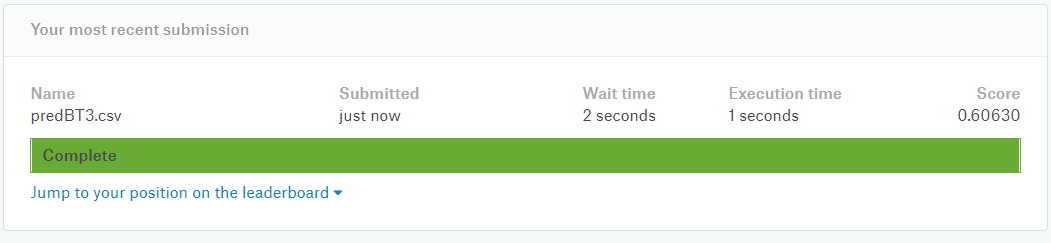

In [23]:
from IPython.display import Image
Image("BT.png")

El valor score que se obtuvo en esta predicción es de aproximadamente 0.61, es decir que el modelo es bueno; sin embargo 
podría mejorarse.